# Ransomware Static Analysis

# Preparation

In [1]:
! pip install bottleneck numexpr pandas pefile ete3 pyqt5

^C


In [2]:
import glob
import numpy as np
import os
import pandas as pd
import pefile
# import PyQt5

In [3]:
ransomware_path = "C:/sample/ransomware/"
system32_path = "C:/sample/good/System32/"

In [4]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.width', 1000)
# pd.set_option('max_colwidth', 400)

In [4]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

# Define Functions

In [4]:
# Define function to create dataframes

import logging

# DateTime:Level:Arquivo:Mensagem
log_format = '%(asctime)s:%(levelname)s:%(filename)s:%(message)s'

logging.basicConfig(filename='CreateDataFrame.log',
                    # w -> sobrescreve o arquivo a cada log
                    # a -> não sobrescreve o arquivo
                    filemode='w',
                    level=logging.DEBUG,
                    format=log_format)

logger = logging.getLogger('root')

def CreateDataFrame(path, attribute, index=0, count=0):
    df = pd.DataFrame()
    filesPath = glob.glob(path + "*")
    nameFiles = os.listdir(path)
    for filePath in filesPath:
        # print(file)
        pe = pefile.PE(filePath)
        if attribute == "FILE_HEADER":
            df.loc[index,'Name'] = nameFiles[index]
            for k, v in pe.dump_dict()['FILE_HEADER'].items():
                if isinstance(v,dict):
                    # print("{}: {}".format(k, v["Value"]))
                    df.loc[index, k] = v["Value"]
            # index = 0
            for k, v in pe.dump_dict()['OPTIONAL_HEADER'].items():
                if isinstance(v,dict):
                    # print("{}\n{}: {}".format(filePath, k, v["Value"]))
                    df.loc[index, k] = v["Value"]
            index += 1
        elif attribute == "DIRECTORY_ENTRY_IMPORT":
            try:
                for entry in pe.DIRECTORY_ENTRY_IMPORT:
                    for function in entry.imports:
                        if function.name != None:
                            # print("File:", filePath, "Dll", entry.dll, "API name:", api_call.name)
                            df.loc[count, 'Name'] = nameFiles[index]
                            df.loc[count, 'Dll'] = entry.dll
                            df.loc[count, 'Function'] = function.name
                            logger.info(f'{filePath} {nameFiles[index]} {entry.dll} {function.name} index={index} count={count}')
                            count += 1
            except AttributeError:
                logger.error(f'AttributeError in {filePath}')
            index += 1
    return df

# Manipulating ransomware dataframe

In [12]:
# Create ransomware dataframe
ransomware_df = CreateDataFrame(ransomware_path, "FILE_HEADER")
# ransomware_df.to_csv("./ransomware_df.csv", index=False)    # Uncomment to save the file.

In [7]:
# Read ransomware CSV file
ransomware_df = pd.read_csv("./ransomware_df.csv")

In [8]:
print(ransomware_df.shape)
ransomware_df.head()

(50, 38)


,Name,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,Reserved1,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
0,131.sample,332.0,5.0,0x571C6108 [Sun Apr 24 06:00:40 2016 UTC],0.0,0.0,224.0,258.0,267.0,11.0,0.0,122880.0,2299392.0,0.0,33303.0,4096.0,126976.0,4194304.0,4096.0,512.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,2433024.0,1024.0,0.0,3.0,33088.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
1,Avaddon.sample,332.0,5.0,0x5D652AF9 [Tue Aug 27 13:07:05 2019 UTC],0.0,0.0,224.0,259.0,267.0,12.0,0.0,69632.0,49323520.0,0.0,22283.0,4096.0,73728.0,4194304.0,4096.0,512.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,49397760.0,1024.0,756569.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
2,Black_Mamba.sample,332.0,3.0,0x5F54102B [Sat Sep 5 22:24:43 2020 UTC],0.0,0.0,224.0,34.0,267.0,80.0,0.0,11264.0,207360.0,0.0,19398.0,8192.0,24576.0,4194304.0,8192.0,512.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,245760.0,512.0,0.0,2.0,34144.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
3,Buhtrap.sample,332.0,9.0,0x5F1199B1 [Fri Jul 17 12:29:37 2020 UTC],0.0,0.0,224.0,33166.0,267.0,2.0,25.0,192512.0,23552.0,0.0,198356.0,4096.0,200704.0,4194304.0,4096.0,512.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,1310720.0,1024.0,0.0,2.0,320.0,1048576.0,16384.0,1048576.0,4096.0,0.0,16.0
4,Buran.sample,332.0,2.0,0x5D6E97C2 [Tue Sep 3 16:41:38 2019 UTC],0.0,0.0,224.0,271.0,267.0,3.0,2.0,320000.0,7168.0,0.0,31218.0,4096.0,327680.0,4194304.0,4096.0,512.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,335872.0,1024.0,0.0,2.0,0.0,1048576.0,16384.0,1048576.0,4096.0,0.0,16.0


In [27]:
# Create ransomware functions dataframe
ransomware_functions = CreateDataFrame(ransomware_path, "DIRECTORY_ENTRY_IMPORT")
# ransomware_functions.to_csv("./ransomware_functions.csv", index=False)    # Uncomment to save the file

In [5]:
# Read ransomware fuctions CSV file
ransomware_functions = pd.read_csv("./ransomware_functions.csv")

In [6]:
ransomware_functions

,Name,Dll,Function
0,131.sample,b'SHLWAPI.dll',b'PathFileExistsW'
1,131.sample,b'SHLWAPI.dll',b'PathFileExistsA'
2,131.sample,b'KERNEL32.dll',b'Sleep'
3,131.sample,b'KERNEL32.dll',b'SizeofResource'
4,131.sample,b'KERNEL32.dll',b'GetConsoleWindow'
...,...,...,...
4314,Win32.Wannacry.sample,b'MSVCRT.dll',b'free'
4315,Win32.Wannacry.sample,b'MSVCRT.dll',b'_initterm'
4316,Win32.Wannacry.sample,b'MSVCRT.dll',b'malloc'
4317,Win32.Wannacry.sample,b'MSVCRT.dll',b'_adjust_fdiv'


In [11]:
# Create System32 dataframe
system32_df = CreateDataFrame(system32_path, "FILE_HEADER")
# system32_df.to_csv("./system32_df.csv", index=False)  # Uncomment to save the file

In [7]:
# Read System32 CSV file
system32_df = pd.read_csv("./system32_df.csv")

In [8]:
system32_df.head()

,Name,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,Reserved1,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,BaseOfData
0,aadcloudap.dll,34404.0,7.0,0x5CCD15A1 [Sat May 4 04:31:29 2019 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,273920.0,153600.0,0.0,19472.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,446464.0,1024.0,439425.0,3.0,16864.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
1,aadtb.dll,34404.0,7.0,0x60BAFDF1 [Sat Jun 5 04:30:41 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,620032.0,505344.0,0.0,527744.0,4096.0,6.442451e+09,4096.0,512.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,1142784.0,1024.0,1139912.0,2.0,16736.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
2,AboveLockAppHost.dll,34404.0,7.0,0x5FF78DB7 [Thu Jan 7 22:39:51 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,180224.0,107520.0,0.0,33072.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,307200.0,1024.0,334257.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
3,accessibilitycpl.dll,34404.0,7.0,0x57899883 [Sat Jul 16 02:14:27 2016 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,145920.0,3691520.0,0.0,5680.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,3854336.0,1024.0,3825415.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
4,accountaccessor.dll,34404.0,7.0,0x5FF78E70 [Thu Jan 7 22:42:56 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,226304.0,97792.0,0.0,223920.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,339968.0,1024.0,382452.0,3.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN


In [29]:
# Create system32 functions dataframe
system32_functions = CreateDataFrame(system32_path, "DIRECTORY_ENTRY_IMPORT")
# system32_functions.to_csv("./system32_functions.csv", index=False)   # Uncomment to save the file

In [9]:
# Read System32 functions CSV file
system32_functions = pd.read_csv("./system32_functions.csv")

In [10]:
system32_functions

,Name,Dll,Function
0,aadcloudap.dll,b'msvcrt.dll',b'_onexit'
1,aadcloudap.dll,b'msvcrt.dll',b'__dllonexit'
2,aadcloudap.dll,b'msvcrt.dll',b'_unlock'
3,aadcloudap.dll,b'msvcrt.dll',b'??1type_info@@UEAA@XZ'
4,aadcloudap.dll,b'msvcrt.dll',b'_errno'
...,...,...,...
460142,ztrace_maps.dll,b'api-ms-win-core-sysinfo-l1-2-1.dll',b'GetSystemTimeAsFileTime'
460143,ztrace_maps.dll,b'api-ms-win-core-interlocked-l1-2-0.dll',b'InitializeSListHead'
460144,ztrace_maps.dll,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlCaptureContext'
460145,ztrace_maps.dll,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlLookupFunctionEntry'


# Applying DAMICORE

## Create TXT files from ransomwares

In [32]:
def CreateTXTFiles(input_path, ransomware=False):
    output_path = "../damicore/executable-functions/"
    filesPath = glob.glob(input_path + "*")
    nameFiles = os.listdir(input_path)
    index = 0
    count = 0
    for filePath in filesPath:
        df = pd.DataFrame()
        pe = pefile.PE(filePath)
        try:
            for entry in pe.DIRECTORY_ENTRY_IMPORT:
                for function in entry.imports:
                    if function.name != None:
                        # print("File:", filePath, "Dll", entry.dll, "API name:", api_call.name)
                        # df.loc[count, 'Name'] = nameFiles[index]
                        df.loc[count, 'Dll'] = entry.dll
                        df.loc[count, 'Function'] = function.name
                        count += 1
        except AttributeError:
            print("File", filePath, "does not have imports.")
        
        if ransomware:
            output = output_path + "RANS-" + nameFiles[index]
        else:
            output = output_path + "GOOD-" + nameFiles[index]
        
        with open(output, 'w', newline='\r\n') as f:
            f.write( df.to_string(header=False, index=False) )
        index += 1
        count = 0


In [33]:
CreateTXTFiles(ransomware_path, True)
# CreateTXTFiles(system32_path) # Uncomment to save TXT files of goodwares.

File C:/sample/ransomware\Sodinokibi.sample does not have imports.
File C:/sample/ransomware\Thanos.sample does not have imports.


## Manipulating phylogenetic tree

### Manipulating phylogenetic tree with ETE Toolkit

In [18]:
# import ete3
t = ete3.PhyloTree("../damicore/results/texts.newick")

In [19]:
# t.write(outfile="../damicore/results/tree.txt")
t.show()

TypeError: index 0 has type 'float' but 'int' is expected

In [82]:
import ete3
ete3.__file__
%run "C:\\Users\\Nilson\\AppData\\Roaming\\Python\\Python310\\site-packages\\ete3\\__init__.py"


ImportError: attempted relative import with no known parent package

In [1]:
pip install ncbitaxonomy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip

### Manipulating phylogenetic tree with Dendropy

In [21]:
pip install dendropy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 15.2/15.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for dendropy, since package 'wheel' is not installed.
  Running setup.py install for dendropy: started
  Running setup.py install for dendropy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [22]:
import dendropy

In [30]:
tree1 = dendropy.Tree.get(path="../damicore/results/texts.newick", schema="newick")
# tree1.print_plot()
# print(tree1)

In [ ]:
tree_data = []
tree = dendropy.Tree.get(path="../damicore/results/texts.newick",schema="newick")
pdc = tree.phylogenetic_distance_matrix()
for i, t1 in enumerate(tree.taxon_namespace[:-1]):
    for t2 in tree.taxon_namespace[i+1:]:
        tip_pair = {}
        tip_dist_list = []
        tip_pair[t1] = t2
        distance = pdc(t1, t2)
        tip_dist_list.append(tip_pair)
        tip_dist_list.append(distance)
        tree_data.append(tip_dist_list)

print(tree_data)

### Manipulating phylogenetic tree with Phylo

In [ ]:
! pip install Bio Matplotlib pydot

In [27]:
from Bio import Phylo

In [ ]:
tree = Phylo.read("../damicore/results/test.newick", "newick")
print(tree)

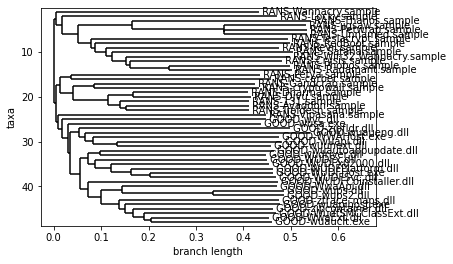

In [29]:
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [30]:
import pylab
Phylo.draw_graphviz(tree)
pylab.show()

AttributeError: module 'Bio.Phylo' has no attribute 'draw_graphviz'

## Understanding Generated Tree

In [5]:
ransomware_functions = pd.read_csv("./ransomware_functions.csv")
system32_functions = pd.read_csv("./system32_functions.csv")
peFunctions = pd.concat([ransomware_functions, system32_functions], ignore_index=True)

totalRans = len(ransomware_functions.groupby('Name').nunique())
totalGoods = len(system32_functions.groupby('Name').nunique())
totalPEs = totalRans + totalGoods

In [6]:
def AmountInGoodwares(df):
    df.reset_index(drop=True, inplace=True)
    df['AmountInGoodwares'] = 0
    for i in range(len(df)):
        func = df.loc[i, "Function"]
        df.loc[i, "AmountInGoodwares"] = system32_functions[system32_functions.Function == func].shape[0]

def AmountInRansomwares(df):
    df.reset_index(drop=True, inplace=True)
    df['AmountInRansomwares'] = 0
    for i in range(len(df)):
        func = df.loc[i, "Function"]
        df.loc[i, "AmountInRansomwares"] = ransomware_functions[ransomware_functions.Function == func].shape[0]

### Branch 1

* GOOD-Microsoft.Uev.SyncController.exe
* GOOD-acu.exe
* GOOD-mtedit.exe
* RANS-Ryuk.sample
* RANS-Lonal.sample
* RANS-Jigsaw.sample
* RANS-Petwrap.sample
* RANS-Unnamed.sample
* RANS-Black_Mamba.sample
* RANS-Ghghdshch130.sample
* RANS-Chaos_Builder.sample
* RANS-Chaos_builder_v4.sample

In [7]:
branch1 = peFunctions[  peFunctions['Name'].str.contains("SyncController.exe") | \
                    peFunctions['Name'].str.contains("acu\.exe") | \
                    peFunctions['Name'].str.contains("mtedit") | \
                    peFunctions['Name'].str.contains("Ryuk\.") | \
                    peFunctions['Name'].str.contains("Lonal") | \
                    peFunctions['Name'].str.contains("Jigsaw") | \
                    peFunctions['Name'].str.contains("Petwrap") | \
                    peFunctions['Name'].str.contains("Unnamed") | \
                    peFunctions['Name'].str.contains("Black_Mamba") | \
                    peFunctions['Name'].str.contains("Ghghdshch130") | \
                    peFunctions['Name'].str.contains("Chaos_Builder") | \
                    peFunctions['Name'].str.contains("Chaos_builder_v4")]
branch1

,Name,Dll,Function
204,Black_Mamba.sample,b'mscoree.dll',b'_CorExeMain'
760,Chaos_Builder.sample,b'mscoree.dll',b'_CorExeMain'
761,Chaos_builder_v4.sample,b'mscoree.dll',b'_CorExeMain'
1481,Ghghdshch130.sample,b'mscoree.dll',b'_CorExeMain'
1482,Jigsaw.sample,b'mscoree.dll',b'_CorExeMain'
2123,Lonal.sample,b'mscoree.dll',b'_CorExeMain'
2439,Petwrap.sample,b'mscoree.dll',b'_CorExeMain'
3015,Ryuk.sample,b'mscoree.dll',b'_CorExeMain'
3462,Unnamed.sample,b'mscoree.dll',b'_CorExeMain'
8298,acu.exe,b'mscoree.dll',b'_CorExeMain'


In [8]:
branch1.groupby('Name').nunique()

,Dll,Function
Name,,
Black_Mamba.sample,1,1
Chaos_Builder.sample,1,1
Chaos_builder_v4.sample,1,1
Ghghdshch130.sample,1,1
Jigsaw.sample,1,1
Lonal.sample,1,1
Microsoft.Uev.SyncController.exe,1,1
Petwrap.sample,1,1
Ryuk.sample,1,1


Near nodes

In [32]:
system32_functions[system32_functions['Name'].str.contains("WmiAccess")]

,Name,Dll,Function
195813,Microsoft.Uev.Management.WmiAccess.dll,b'mscoree.dll',b'_CorDllMain'


In [11]:
pesCorExeMain = peFunctions[peFunctions['Function'].str.contains('CorExeMain', case=False)]
similarBranch1 = pd.concat([pesCorExeMain, branch1]).drop_duplicates(keep=False)
similarBranch1

,Name,Dll,Function
103434,dsac.exe,b'mscoree.dll',b'_CorExeMain'
171774,LbfoAdmin.exe,b'mscoree.dll',b'_CorExeMain'
313552,ScriptRunner.exe,b'mscoree.dll',b'_CorExeMain'
319694,ServerManager.exe,b'mscoree.dll',b'_CorExeMain'
344732,stordiag.exe,b'mscoree.dll',b'_CorExeMain'
367127,TsWpfWrp.exe,b'mscoree.dll',b'_CorExeMain'
371211,UevAgentPolicyGenerator.exe,b'mscoree.dll',b'_CorExeMain'
371212,UevAppMonitor.exe,b'mscoree.dll',b'_CorExeMain'
371213,UevTemplateBaselineGenerator.exe,b'mscoree.dll',b'_CorExeMain'
371214,UevTemplateConfigItemGenerator.exe,b'mscoree.dll',b'_CorExeMain'


In [12]:
similarBranch1.groupby('Name').nunique()

,Dll,Function
Name,,
LbfoAdmin.exe,1,1
ScriptRunner.exe,1,1
ServerManager.exe,1,1
TsWpfWrp.exe,1,1
UevAgentPolicyGenerator.exe,1,1
UevAppMonitor.exe,1,1
UevTemplateBaselineGenerator.exe,1,1
UevTemplateConfigItemGenerator.exe,1,1
dsac.exe,1,1


### Branch 2

* GOOD-BPAInst.dll
* GOOD-MuxInst.dll
* GOOD-miguiresource.dll
* GOOD-mscat32.dll
* GOOD-mssip32.dll
* RANS-Crysis.sample
* RANS-LordEK.sample
* RANS-Phobos.sample
* RANS-Radamant.sample
* RANS-File.sample
* RANS-Win32.Wannacry.sample

In [13]:
branch2 = peFunctions[  peFunctions['Name'].str.contains("BPAInst.dll") | \
                        peFunctions['Name'].str.contains("MuxInst.dll") | \
                        peFunctions['Name'].str.contains("miguiresource.dll") | \
                        peFunctions['Name'].str.contains("mscat32.dll") | \
                        peFunctions['Name'].str.contains("mssip32.dll") | \
                        peFunctions['Name'].str.contains("Crysis.sample") | \
                        peFunctions['Name'].str.contains("LordEK.sample") | \
                        peFunctions['Name'].str.contains("Phobos.sample") | \
                        peFunctions['Name'].str.contains("Radamant.sample") | \
                        peFunctions['Name'].str.contains("File.sample") | \
                        peFunctions['Name'].str.contains("Win32.Wannacry.sample")]
branch2

,Name,Dll,Function
945,Crysis.sample,b'KERNEL32.dll',b'GetProcAddress'
946,Crysis.sample,b'KERNEL32.dll',b'LoadLibraryA'
947,Crysis.sample,b'KERNEL32.dll',b'WaitForSingleObject'
948,Crysis.sample,b'KERNEL32.dll',b'InitializeCriticalSectionAndSpinCount'
949,Crysis.sample,b'KERNEL32.dll',b'LeaveCriticalSection'
950,Crysis.sample,b'KERNEL32.dll',b'GetLastError'
951,Crysis.sample,b'KERNEL32.dll',b'EnterCriticalSection'
952,Crysis.sample,b'KERNEL32.dll',b'ReleaseMutex'
953,Crysis.sample,b'KERNEL32.dll',b'CloseHandle'
1276,File.sample,b'SHLWAPI.dll',b'PathAppendW'


In [14]:
PEsBranch2 = branch2.groupby('Name').nunique()
PEsBranch2

,Dll,Function
Name,,
BPAInst.dll,1,6
Crysis.sample,1,9
File.sample,4,9
LordEK.sample,1,4
MuxInst.dll,1,6
Phobos.sample,4,7
Radamant.sample,7,12
Win32.Wannacry.sample,2,13
miguiresource.dll,2,12


In [15]:
print("PE's total in branch2:", len(PEsBranch2))
print("Ransomware's total:", totalRans)
print("Goodwares's total:", totalGoods)

funcsBranch2 = branch2.groupby('Function').count().sort_values(['Name'], ascending=False).reset_index().head(20)
AmountInGoodwares(funcsBranch2)
AmountInRansomwares(funcsBranch2)
funcsBranch2.sort_values('Name', ascending=False)

PE's total in branch2: 11
Ransomware's total: 48
Goodwares's total: 3104


,Function,Name,Dll,AmountInGoodwares,AmountInRansomwares
0,b'GetCurrentProcessId',5,5,2992,21
2,b'GetSystemTimeAsFileTime',5,5,2990,17
3,b'GetTickCount',5,5,2780,22
4,b'QueryPerformanceCounter',5,5,2988,23
1,b'GetCurrentThreadId',5,5,2990,24
5,b'malloc',4,4,2428,5
6,b'free',4,4,2434,7
7,b'_initterm',4,4,2871,5
8,b'GetProcAddress',4,4,1963,37
9,b'LoadLibraryA',4,4,126,27


In above table, it is possible to verify that 0 ransomwares use some functions, and 37 ransomwares use GetProcAddress.

In [21]:
ransomware_functions[ransomware_functions['Function'].str.contains("amsg_exit")].shape[0]

0

### Branch 3

* RANS-Djvu.sample
* RANS-Ransomware.tmp2.sample
* RANS-Lockbit.Trojan.sample
* RANS-Mamba_xox_b.sample
* RANS-Dharma.sample
* RANS-Faux-v3.sample
* RANS-Ryuk_copy.sample
* RANS-Troldesh.sample
* RANS-Ryuk2.sample
* RANS-Ransomware.tmp.sample
* RANS-Avaddon.sample
* RANS-131.sample

In [22]:
branch3 = peFunctions[  peFunctions['Name'].str.contains("Djvu.sample") | \
                        peFunctions['Name'].str.contains("Ransomware.tmp2.sample") | \
                        peFunctions['Name'].str.contains("Lockbit.Trojan.sample") | \
                        peFunctions['Name'].str.contains("Mamba_xox_b.sample") | \
                        peFunctions['Name'].str.contains("Dharma.sample") | \
                        peFunctions['Name'].str.contains("Faux-v3.sample") | \
                        peFunctions['Name'].str.contains("Ryuk_copy.sample") | \
                        peFunctions['Name'].str.contains("Troldesh.sample") | \
                        peFunctions['Name'].str.contains("Ryuk2.sample") | \
                        peFunctions['Name'].str.contains("Ransomware.tmp.sample") | \
                        peFunctions['Name'].str.contains("Avaddon.sample") | \
                        peFunctions['Name'].str.contains("131.sample")]
branch3

,Name,Dll,Function
0,131.sample,b'SHLWAPI.dll',b'PathFileExistsW'
1,131.sample,b'SHLWAPI.dll',b'PathFileExistsA'
2,131.sample,b'KERNEL32.dll',b'Sleep'
3,131.sample,b'KERNEL32.dll',b'SizeofResource'
4,131.sample,b'KERNEL32.dll',b'GetConsoleWindow'
...,...,...,...
3457,Troldesh.sample,b'GDI32.dll',b'SetWinMetaFileBits'
3458,Troldesh.sample,b'GDI32.dll',b'StretchBlt'
3459,Troldesh.sample,b'GDI32.dll',b'CreateCompatibleBitmap'
3460,Troldesh.sample,b'GDI32.dll',b'EndPath'


In [23]:
PEsBranch3 = branch3.groupby('Name').nunique()
PEsBranch3

,Dll,Function
Name,,
131.sample,5,112
Avaddon.sample,4,92
Dharma.sample,4,81
Djvu.sample,3,107
Faux-v3.sample,1,134
Lockbit.Trojan.sample,5,90
Mamba_xox_b.sample,2,71
Ransomware.tmp.sample,3,68
Ransomware.tmp2.sample,2,93


In [33]:
print("PE's total in branch3 (all are ransomwares):", len(PEsBranch3))
print("Ransomware's total:", totalRans)
print("Goodwares's total:", totalGoods)
funcsBranch3 = branch3.groupby('Function').count().sort_values(['Name'], ascending=False).reset_index().head(50)
AmountInGoodwares(funcsBranch3)
AmountInRansomwares(funcsBranch3)
funcsBranch3.sort_values(['Name', 'AmountInGoodwares'], ascending=[False, True]).reset_index()

PE's total in branch3 (all are ransomwares): 12
Ransomware's total: 48
Goodwares's total: 3104


,index,Function,Name,Dll,AmountInGoodwares,AmountInRansomwares
0,26,b'RtlUnwind',12,12,5,20
1,40,b'GetOEMCP',12,12,74,17
2,25,b'FreeEnvironmentStringsW',12,12,76,18
3,1,b'GetEnvironmentStringsW',12,12,79,19
4,15,b'IsValidCodePage',12,12,82,16
5,32,b'GetCPInfo',12,12,93,21
6,4,b'ExitProcess',12,12,164,33
7,31,b'GetACP',12,12,176,20
8,0,b'LCMapStringW',12,12,177,17
9,29,b'GetStringTypeW',12,12,181,17


In [26]:
goods_RtlUnwind = system32_functions[system32_functions['Function'].str.contains("RtlUnwind'", case=False)]
goods_RtlUnwind = pd.DataFrame(goods_RtlUnwind['Name'])
goods_GetOEMCP = system32_functions[system32_functions['Function'].str.contains("GetOEMCP'", case=False)]
goods_GetOEMCP = pd.DataFrame(goods_GetOEMCP['Name'])
goods_FreeEnv = system32_functions[system32_functions['Function'].str.contains("FreeEnvironmentStringsW", case=False)]
goods_FreeEnv = pd.DataFrame(goods_FreeEnv['Name'])

diff_df = pd.merge(goods_RtlUnwind, goods_FreeEnv, how='outer', indicator='Exist')
diff_df = diff_df.loc[diff_df['Exist'] == 'both']
diff_df

,Name,Exist
0,adal.dll,both
1,kernel32.dll,both
3,vm3dgl64.dll,both
4,vm3dservice.exe,both


### General Analysis

In [28]:
### Uncomment to generate peFunctions.csv

# peFunctions = peFunctions.groupby('Function').nunique().sort_values(['Name'], ascending=False).reset_index()
# AmountInGoodwares(peFunctions)
# AmountInRansomwares(peFunctions)
# peFunctions.to_csv("./peFunctions.csv", index=False)    # Uncomment to save the file.

In [29]:
print("Ransomwares's total:", totalRans)
print("Goodwares's total:", totalGoods)
print("PE's total:", totalPEs)

Ransomwares's total: 48
Goodwares's total: 3104
PE's total: 3152


In [39]:
peFunctions = pd.read_csv("./peFunctions.csv")
# peFunctions.sort_values(['AmountInRansomwares', 'AmountInGoodwares'], ascending=[False, False]).reset_index().head(50)
peFunctions.sort_values(['AmountInRansomwares', 'AmountInGoodwares'], ascending=[True, False]).reset_index().head(300)
# peFunctions.sort_values(['AmountInGoodwares', 'AmountInRansomwares'], ascending=[False, True]).reset_index().head(50)

,index,Function,Name,Dll,AmountInGoodwares,AmountInRansomwares
0,4,b'RtlCaptureContext',2999,5,2999,0
1,5,b'RtlVirtualUnwind',2998,5,2998,0
2,6,b'RtlLookupFunctionEntry',2998,5,2998,0
3,11,b'__C_specific_handler',2924,12,2924,0
4,16,b'_amsg_exit',2593,5,2593,0
5,37,b'_unlock',1709,5,1709,0
6,38,b'_lock',1709,5,1709,0
7,41,b'__CxxFrameHandler3',1696,6,1696,0
8,43,b'DisableThreadLibraryCalls',1597,7,1597,0
9,44,b'_callnewh',1592,2,1592,0
